In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import Precision, Recall, AUC
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [2]:
data = pd.read_excel('/Users/Jide_1/Springboard/default of credit card clients.xls', header=1)


In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data = data.drop('ID', axis=1)

In [5]:
data.shape

(30000, 24)

In [6]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
data.rename(columns={'default payment next month': 'default'}, inplace=True)

In [8]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
features = [i for i in data.columns if i != 'default']
target = ['default']

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [11]:
df_scale = scale(data[features])


In [12]:
df_scaled = pd.DataFrame(df_scale, columns=features)
df_scaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [13]:
df_scaled.std(ddof =0)

LIMIT_BAL    1.0
SEX          1.0
EDUCATION    1.0
MARRIAGE     1.0
AGE          1.0
PAY_0        1.0
PAY_2        1.0
PAY_3        1.0
PAY_4        1.0
PAY_5        1.0
PAY_6        1.0
BILL_AMT1    1.0
BILL_AMT2    1.0
BILL_AMT3    1.0
BILL_AMT4    1.0
BILL_AMT5    1.0
BILL_AMT6    1.0
PAY_AMT1     1.0
PAY_AMT2     1.0
PAY_AMT3     1.0
PAY_AMT4     1.0
PAY_AMT5     1.0
PAY_AMT6     1.0
dtype: float64

In [50]:
df_pca = PCA().fit(df_scaled)

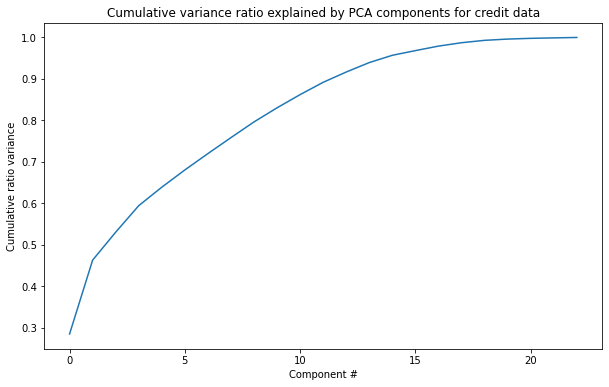

In [51]:
plt.subplots(figsize=(10, 6))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for credit data');

In [54]:
x_pca = df_pca.transform(df_scaled)

In [55]:
X = df_scaled[features].values
y = data[target].values

In [60]:
y = to_categorical(y)

In [66]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape = (23,)))
model.add(Dense(75, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[AUC()])

In [67]:
results = model.fit(X, y, validation_split=.5, epochs=40, batch_size=64)

Train on 15000 samples, validate on 15000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 233us/step - loss: 0.5445 - auc_7: 0.8016 - val_loss: 0.4744 - val_auc_7: 0.8582
Epoch 2/40
15000/15000 [==============================] - 3s 167us/step - loss: 0.4772 - auc_7: 0.8397 - val_loss: 0.4399 - val_auc_7: 0.8667
Epoch 3/40
15000/15000 [==============================] - 2s 163us/step - loss: 0.4709 - auc_7: 0.8428 - val_loss: 0.4381 - val_auc_7: 0.8686
Epoch 4/40
15000/15000 [==============================] - 3s 172us/step - loss: 0.4686 - auc_7: 0.8464 - val_loss: 0.4377 - val_auc_7: 0.8703
Epoch 5/40
15000/15000 [==============================] - 3s 177us/step - loss: 0.4674 - auc_7: 0.8477 - val_loss: 0.4342 - val_auc_7: 0.8700
Epoch 6/40
15000/15000 [==============================] - 3s 171us/step - loss: 0.4655 - auc_7: 0.8493 - val_loss: 0.4362 - val_auc_7: 0.8690
Epoch 7/40
15000/15000 [==============================] - 2s 164us/step - loss: 0.4653 - auc_7: 0.

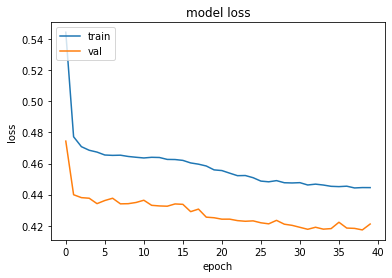

In [68]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

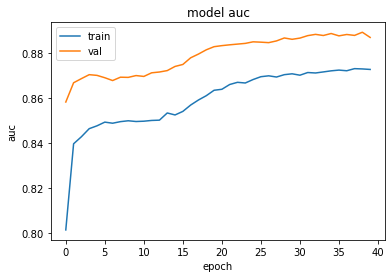

In [69]:
plt.plot(results.history['auc_7'])
plt.plot(results.history['val_auc_7'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()